In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
az.style.use('arviz-darkgrid')

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)
data

array([1, 0, 0, 0])

In [3]:
with pm.Model() as our_first_model:
    # a priori
    theta = pm.Beta('theta', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, random_seed=123,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 6939.09draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c34243da0>,
      dtype=object)

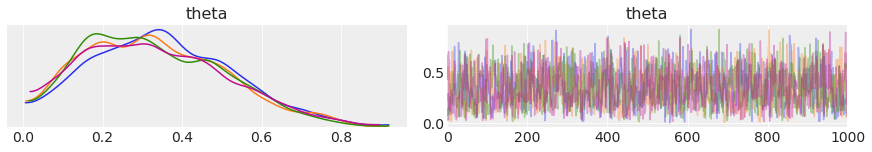

In [4]:
az.plot_trace(trace)

In [5]:
az.summary(trace)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
theta,0.34,0.18,0.01,0.04,0.66,1547.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c36b3a588>],
      dtype=object)

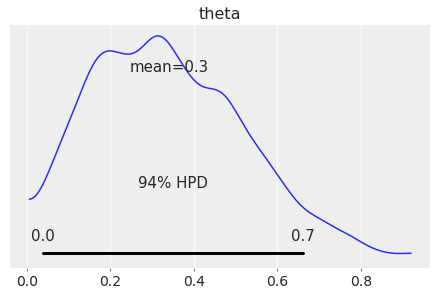

In [6]:
az.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3469f940>],
      dtype=object)

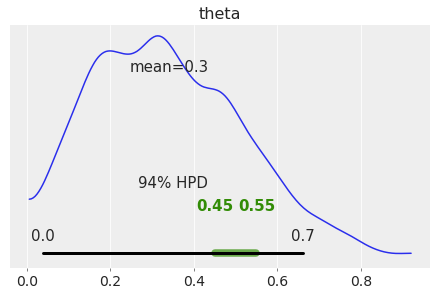

In [7]:
az.plot_posterior(trace, rope=[0.45, .55])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c34235240>],
      dtype=object)

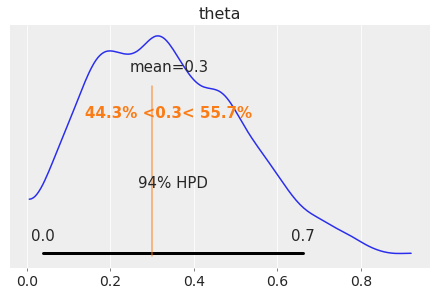

In [9]:
az.plot_posterior(trace, ref_val=0.3) 

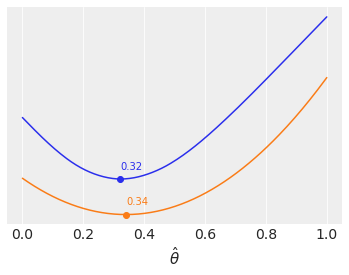

In [11]:
grid = np.linspace(0, 1, 200)
theta_pos = trace['theta']
lossf_a = [np.mean(abs(i - theta_pos)) for i in grid]
lossf_b = [np.mean((i - theta_pos)**2) for i in grid]

for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    plt.plot(grid, lossf, c)
    plt.plot(grid[mini], lossf[mini], 'o', color=c)
    plt.annotate('{:.2f}'.format(grid[mini]),
                 (grid[mini], lossf[mini] + 0.03), color=c)
    plt.yticks([])
    plt.xlabel(r'$\hat \theta$')

Text(0.5, 0, '$\\hat \\theta$')

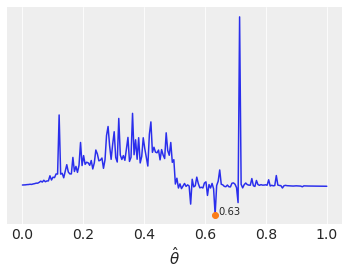

In [14]:
lossf = []
for i in grid:
    if i < 0.5:
        f = np.mean(np.pi * theta_pos / np.abs(i - theta_pos))
    else:
        f = np.mean(1 / (i - theta_pos))
    lossf.append(f)

mini = np.argmin(lossf)
plt.plot(grid, lossf)
plt.plot(grid[mini], lossf[mini], 'o')
plt.annotate('{:.2f}'.format(grid[mini]),
             (grid[mini] + 0.01, lossf[mini] + 0.1))
plt.yticks([])
plt.xlabel(r'$\hat \theta$')

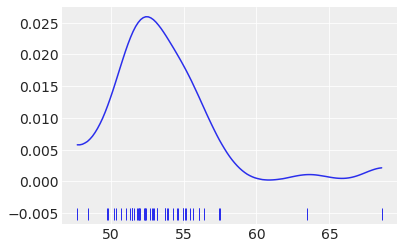

In [20]:
data = pd.read_csv('../data/chemical_shifts.csv',header=None)
az.plot_kde(data,rug=True)